In [1]:
import numpy as np
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_eye = pd.read_table(r"D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_EDF\J0307.txt")
df_beh = pd.read_csv(r"D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_BHV\20230307_bhv.csv")

df_eye_index = df_eye.TRIAL_LABEL.str.split(':').str[1]
df_eye['TRIAL_LABEL']=df_eye_index
df_eye['TRIAL_LABEL']=df_eye['TRIAL_LABEL'].astype(int)

In [3]:
#df_beh['choice_rt'] = df_beh['choice_rt']-1
df_beh['choice_rt']

0     0.314185
1     0.410140
2     0.566356
3     6.134166
4     0.224713
        ...   
95    0.779434
96    1.126588
97    0.682724
98    2.405389
99    0.382138
Name: choice_rt, Length: 100, dtype: float64

In [4]:
df_eye_fix = {'trial_index':[],'fix_duration':[],'fix_x':[],'fix_y':[],'fix_roi':[],'pupil_size':[],'fix_start_time':[]}
df_final = {'trial_index':[],'bottom_duration':[],'bottom_fix_x':[],'bottom_fix_y':[],'left_duration':[],'left_fix_x':[],
'left_fix_y':[],'right_duration':[],'right_fix_x':[],'right_fix_y':[],'response':[],'RT':[],'pupil_size':[],'chosen_pic_position':[],'target_position':[]}
for i in range(0,len(df_eye)):
    df_eye_fix['trial_index'].append(df_eye['IP_INDEX'][i] + (df_eye['TRIAL_LABEL'][i]-1)*4)
    df_eye_fix['fix_duration'].append(df_eye['CURRENT_FIX_DURATION'][i])
    df_eye_fix['fix_x'].append(df_eye['CURRENT_FIX_X'][i])
    df_eye_fix['fix_y'].append(df_eye['CURRENT_FIX_Y'][i])
    df_eye_fix['fix_roi'].append(df_eye['CURRENT_FIX_INTEREST_AREAS'][i])
    df_eye_fix['pupil_size'].append(df_eye['CURRENT_FIX_PUPIL'][i])
    df_eye_fix['fix_start_time'].append(df_eye['CURRENT_FIX_START'][i])
    
df_eye_fix = pd.DataFrame(df_eye_fix)
#df_eye_fix.to_csv('eye_fix.csv')

df_eye_fix['response'] = df_eye_fix['trial_index']
df_eye_fix['RT'] = df_eye_fix['trial_index'].astype(float)
df_eye_fix['target_position'] = df_eye_fix['trial_index'].astype(str)
df_eye_fix['chosen_pic_position'] = df_eye_fix['trial_index'].astype(str)
for i in range(0,len(df_eye_fix)):
    for j in range(0,len(df_beh)):
        if df_eye_fix['trial_index'][i] == df_beh['trial_index'][j]:
            df_eye_fix['response'][i] = df_beh['response'][j]
            df_eye_fix['RT'][i] = df_beh['choice_rt'][j]
            df_eye_fix['target_position'][i] = df_beh['target_pic_position'][j]
            df_eye_fix['chosen_pic_position'][i] = df_beh['pic_chosen_position'][j]
#print(df_eye_fix)

df_final = {'trial_index':[],'bottom_duration':[],'bottom_fix_x':[],'bottom_fix_y':[],'left_duration':[],'left_fix_x':[],
'left_fix_y':[],'right_duration':[],'right_fix_x':[],'right_fix_y':[],'response':[],'RT':[],'pupil_size':[],'chosen_pic_position':[],'target_position':[]}
for i in range(0,len(df_eye_fix)):
    df_final['trial_index'].append(df_eye_fix['trial_index'][i])
    df_final['response'].append(df_eye_fix['response'][i])
    df_final['RT'].append(df_eye_fix['RT'][i])
    df_final['pupil_size'].append(df_eye_fix['pupil_size'][i])
    df_final['chosen_pic_position'].append(df_eye_fix['chosen_pic_position'][i])
    df_final['target_position'].append(df_eye_fix['target_position'][i])
    if df_eye_fix['fix_roi'][i][-2] == '1':
        df_final['bottom_duration'].append(df_eye_fix['fix_duration'][i])
        df_final['bottom_fix_x'].append(df_eye_fix['fix_x'][i])
        df_final['bottom_fix_y'].append(df_eye_fix['fix_y'][i])
        df_final['left_duration'].append(0)
        df_final['left_fix_x'].append(0)
        df_final['left_fix_y'].append(0)
        df_final['right_duration'].append(0)
        df_final['right_fix_x'].append(0)
        df_final['right_fix_y'].append(0)
    if df_eye_fix['fix_roi'][i][-2] == '2':
        df_final['bottom_duration'].append(0)
        df_final['bottom_fix_x'].append(0)
        df_final['bottom_fix_y'].append(0)
        df_final['left_duration'].append(df_eye_fix['fix_duration'][i])
        df_final['left_fix_x'].append(df_eye_fix['fix_x'][i])
        df_final['left_fix_y'].append(df_eye_fix['fix_y'][i])
        df_final['right_duration'].append(0)
        df_final['right_fix_x'].append(0)
        df_final['right_fix_y'].append(0)
    if df_eye_fix['fix_roi'][i][-2] == '3':
        df_final['bottom_duration'].append(0)
        df_final['bottom_fix_x'].append(0)
        df_final['bottom_fix_y'].append(0)
        df_final['left_duration'].append(0)
        df_final['left_fix_x'].append(0)
        df_final['left_fix_y'].append(0)
        df_final['right_duration'].append(df_eye_fix['fix_duration'][i])
        df_final['right_fix_x'].append(df_eye_fix['fix_x'][i])
        df_final['right_fix_y'].append(df_eye_fix['fix_y'][i])
    if df_eye_fix['fix_roi'][i][-2] == ' ':
        df_final['bottom_duration'].append(0)
        df_final['bottom_fix_x'].append(0)
        df_final['bottom_fix_y'].append(0)
        df_final['left_duration'].append(0)
        df_final['left_fix_x'].append(0)
        df_final['left_fix_y'].append(0)
        df_final['right_duration'].append(0)
        df_final['right_fix_x'].append(0)
        df_final['right_fix_y'].append(0)
    if df_eye_fix['fix_roi'][i][-2] == '9':
        df_final['bottom_duration'].append(0)
        df_final['bottom_fix_x'].append(0)
        df_final['bottom_fix_y'].append(0)
        df_final['left_duration'].append(0)
        df_final['left_fix_x'].append(0)
        df_final['left_fix_y'].append(0)
        df_final['right_duration'].append(0)
        df_final['right_fix_x'].append(0)
        df_final['right_fix_y'].append(0)
df_final = pd.DataFrame(df_final)
#df_final.to_csv('df_final.csv')

C:\Users\SEANZH~1\AppData\Local\Temp/ipykernel_8892/3757211227.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye_fix['response'][i] = df_beh['response'][j]
C:\Users\SEANZH~1\AppData\Local\Temp/ipykernel_8892/3757211227.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye_fix['RT'][i] = df_beh['choice_rt'][j]
C:\Users\SEANZH~1\AppData\Local\Temp/ipykernel_8892/3757211227.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [5]:
df_all = pd.concat([df_final.groupby('trial_index')['bottom_duration'].sum(),
                    df_final.groupby('trial_index')['left_duration'].sum(),
                    df_final.groupby('trial_index')['right_duration'].sum(),
                    df_final.groupby('trial_index')['chosen_pic_position'].first(),
                    df_final.groupby('trial_index')['target_position'].first(),
                    df_final.groupby('trial_index')['response'].first(),
                    df_final.groupby('trial_index')['RT'].first()],axis=1).reset_index()
#df_all.to_csv('df_all.csv')
df_all

,trial_index,bottom_duration,left_duration,right_duration,chosen_pic_position,target_position,response,RT
0,1,0,80,0,left,bottom,0,0.314185
1,2,147,0,0,bottom,bottom,1,0.410140
2,3,0,138,0,bottom,left,0,0.566356
3,4,2248,1080,456,right,right,1,6.134166
4,5,0,0,0,left,bottom,0,0.224713
...,...,...,...,...,...,...,...,...
95,96,124,0,0,right,right,1,0.779434
96,97,134,0,0,right,right,1,1.126588
97,98,361,0,0,left,right,0,0.682724
98,99,607,0,0,left,left,1,2.405389


In [6]:
df_all['right_viewing_time_percent'] =100* df_all['right_duration'] / (df_all['right_duration']+df_all['left_duration']+df_all['bottom_duration'])
df_all['left_viewing_time_percent'] = 100* df_all['left_duration'] / (df_all['right_duration']+df_all['left_duration']+df_all['bottom_duration'])
df_all['bottom_viewing_time_percent'] = 100* df_all['bottom_duration'] / (df_all['right_duration']+df_all['left_duration']+df_all['bottom_duration'])
df_all['target_viewing_time_percent'] = [0]*len(df_all)
df_all['foil_viewing_time_percent'] = [0]*len(df_all)
for i in range(0,len(df_all)):
    if df_all['response'][i]==1 and df_all['chosen_pic_position'][i] == 'left':
        df_all['target_viewing_time_percent'][i] = df_all['left_viewing_time_percent'][i]
    if df_all['response'][i]==1 and df_all['chosen_pic_position'][i] == 'right':
        df_all['target_viewing_time_percent'][i] = df_all['right_viewing_time_percent'][i]
    if df_all['response'][i]==1 and df_all['chosen_pic_position'][i] == 'bottom':
        df_all['target_viewing_time_percent'][i] = df_all['bottom_viewing_time_percent'][i]
    if df_all['response'][i]==0 and df_all['chosen_pic_position'][i] == 'left':
        df_all['foil_viewing_time_percent'][i] = df_all['left_viewing_time_percent'][i]
    if df_all['response'][i]==0 and df_all['chosen_pic_position'][i] == 'right':
        df_all['foil_viewing_time_percent'][i] = df_all['right_viewing_time_percent'][i]
    if df_all['response'][i]==0 and df_all['chosen_pic_position'][i] == 'bottom':
        df_all['foil_viewing_time_percent'][i] = df_all['bottom_viewing_time_percent'][i]
df_zero=df_all.fillna(0)
print(df_zero)
df_N=df_all.fillna('N')
df_nonzero = df_N[(df_N['right_viewing_time_percent']!='N')&(df_N['left_viewing_time_percent']!='N')&(df_N['bottom_viewing_time_percent']!='N')].reset_index()
print(df_nonzero)


    trial_index  bottom_duration  left_duration  right_duration  \
0             1                0             80               0   
1             2              147              0               0   
2             3                0            138               0   
3             4             2248           1080             456   
4             5                0              0               0   
..          ...              ...            ...             ...   
95           96              124              0               0   
96           97              134              0               0   
97           98              361              0               0   
98           99              607              0               0   
99          100              139              0               0   

   chosen_pic_position target_position  response        RT  \
0                 left          bottom         0  0.314185   
1               bottom          bottom         1  0.410140   
2        

C:\Users\SEANZH~1\AppData\Local\Temp/ipykernel_8892/3609331776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['foil_viewing_time_percent'][i] = df_all['left_viewing_time_percent'][i]
C:\Users\SEANZH~1\AppData\Local\Temp/ipykernel_8892/3609331776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['target_viewing_time_percent'][i] = df_all['bottom_viewing_time_percent'][i]
C:\Users\SEANZH~1\AppData\Local\Temp/ipykernel_8892/3609331776.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


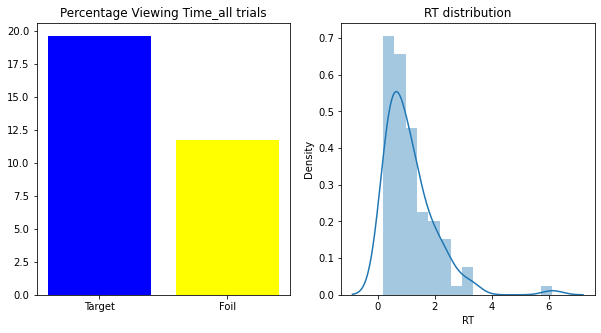

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Percentage Viewing Time_all trials')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.bar(['Target','Foil'], [df_zero['target_viewing_time_percent'].mean(),df_zero['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.8)

plt.subplot(1,2,2)
plt.title('RT distribution')
sns.distplot(df_all['RT'])

df_final.to_csv(r'D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_RESULT\J_0307_CSV_RESULT\20230307_final_test_ALL.csv')

plt.savefig(r'D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_RESULT\J_0307_PIC_RESULT\20230307_ALL.png',dpi = 300,bbox_inches = 'tight')
plt.show()
df_all.to_csv(r'D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_RESULT\J_0307_CSV_RESULT\20230307_for_gpd_ALL.csv')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


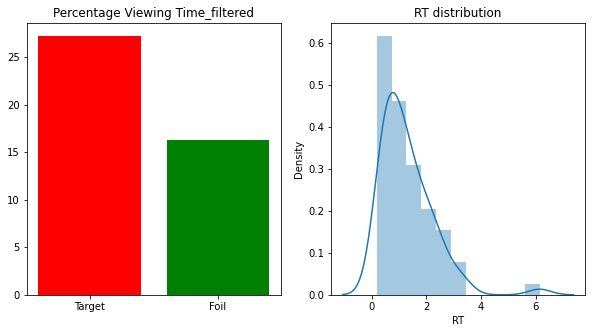

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Percentage Viewing Time_filtered')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.bar(['Target','Foil'], [df_nonzero['target_viewing_time_percent'].mean(),df_nonzero['foil_viewing_time_percent'].mean()],color=['red','green'], width=0.8)

plt.subplot(1,2,2)
plt.title('RT distribution')
sns.distplot(df_nonzero['RT'])

#df_final.to_csv(r'D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0228\J_0228_RESULT\J_0228_CSV_RESULT\20230228_final_test.csv')

plt.savefig(r'D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_RESULT\J_0307_PIC_RESULT\20230307.png',dpi = 300,bbox_inches = 'tight')
plt.show()
df_nonzero.to_csv(r'D:\Jupiter_eyemovement_data\Pic_TOJ\formal\SESSION1\j_0307\J_0307_RESULT\J_0307_CSV_RESULT\20230307_for_gpd.csv')